In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('Datasets/final_data.csv', index_col=0)

In [4]:
df.columns

Index(['Date', 'Location', 'TempLow', 'TempHigh', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Lat_Lon', 'Mean_Rainfall', 'WDGust_N', 'WDGust_NE', 'WDGust_NW',
       'WDGust_S', 'WDGust_SE', 'WDGust_SW', 'WDGust_W', 'WD9am_N', 'WD9am_NE',
       'WD9am_NW', 'WD9am_S', 'WD9am_SE', 'WD9am_SW', 'WD9am_W', 'WD3pm_N',
       'WD3pm_NE', 'WD3pm_NW', 'WD3pm_S', 'WD3pm_SE', 'WD3pm_SW', 'WD3pm_W'],
      dtype='object')

In [8]:
# Fucntion to split data into train and test data
def tt_split(df):
    X = df.drop(['RainTomorrow'], axis=1)
    y = df['RainTomorrow']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    return X_train, X_test, y_train, y_test
# Split training data into train and test data
model_df = df.drop(['Date', 'Location', 'Lat_Lon'], axis=1)
X_train, X_test, y_train, y_test = tt_split(model_df)
X_train.shape, X_test.shape

((112629, 39), (28158, 39))

In [10]:
# Function to perform SMOTE balancing
def smt(X_train, y_train):
    smt = SMOTE(n_jobs=-1, random_state=1)
    X_smt, y_smt = smt.fit_sample(X_train, y_train)
    return X_smt, y_smt
# Perform SMOTE balancing on train and scaled train data
X_train_smt, y_train_smt = smt(X_train, y_train)
X_train_smt.shape

(175218, 39)

In [11]:
# Function to fit a random forest model
def rf(X_train, y_train):
    rf = RandomForestClassifier(n_jobs=-1, random_state=1, n_estimators=1000, oob_score=True)
    rf_fit = rf.fit(X_train, y_train)
    return rf_fit
# Fit random forest model on SMOTE train data, predict on SMOTE test data
rf_fit_smt = rf(X_train_smt, y_train_smt)
rf_pred_smt = rf_fit_smt.predict(X_test)
# F1 score of scaled random forest predictions
accuracy_score(rf_pred_smt, y_test), precision_score(rf_pred_smt, y_test), f1_score(
    rf_pred_smt, y_test)

(0.8604304282974643, 0.5892250444911826, 0.6495452113429642)

In [12]:
rf_feat_imp = pd.Series(rf_fit_smt.feature_importances_, index=X_train.columns).sort_values()

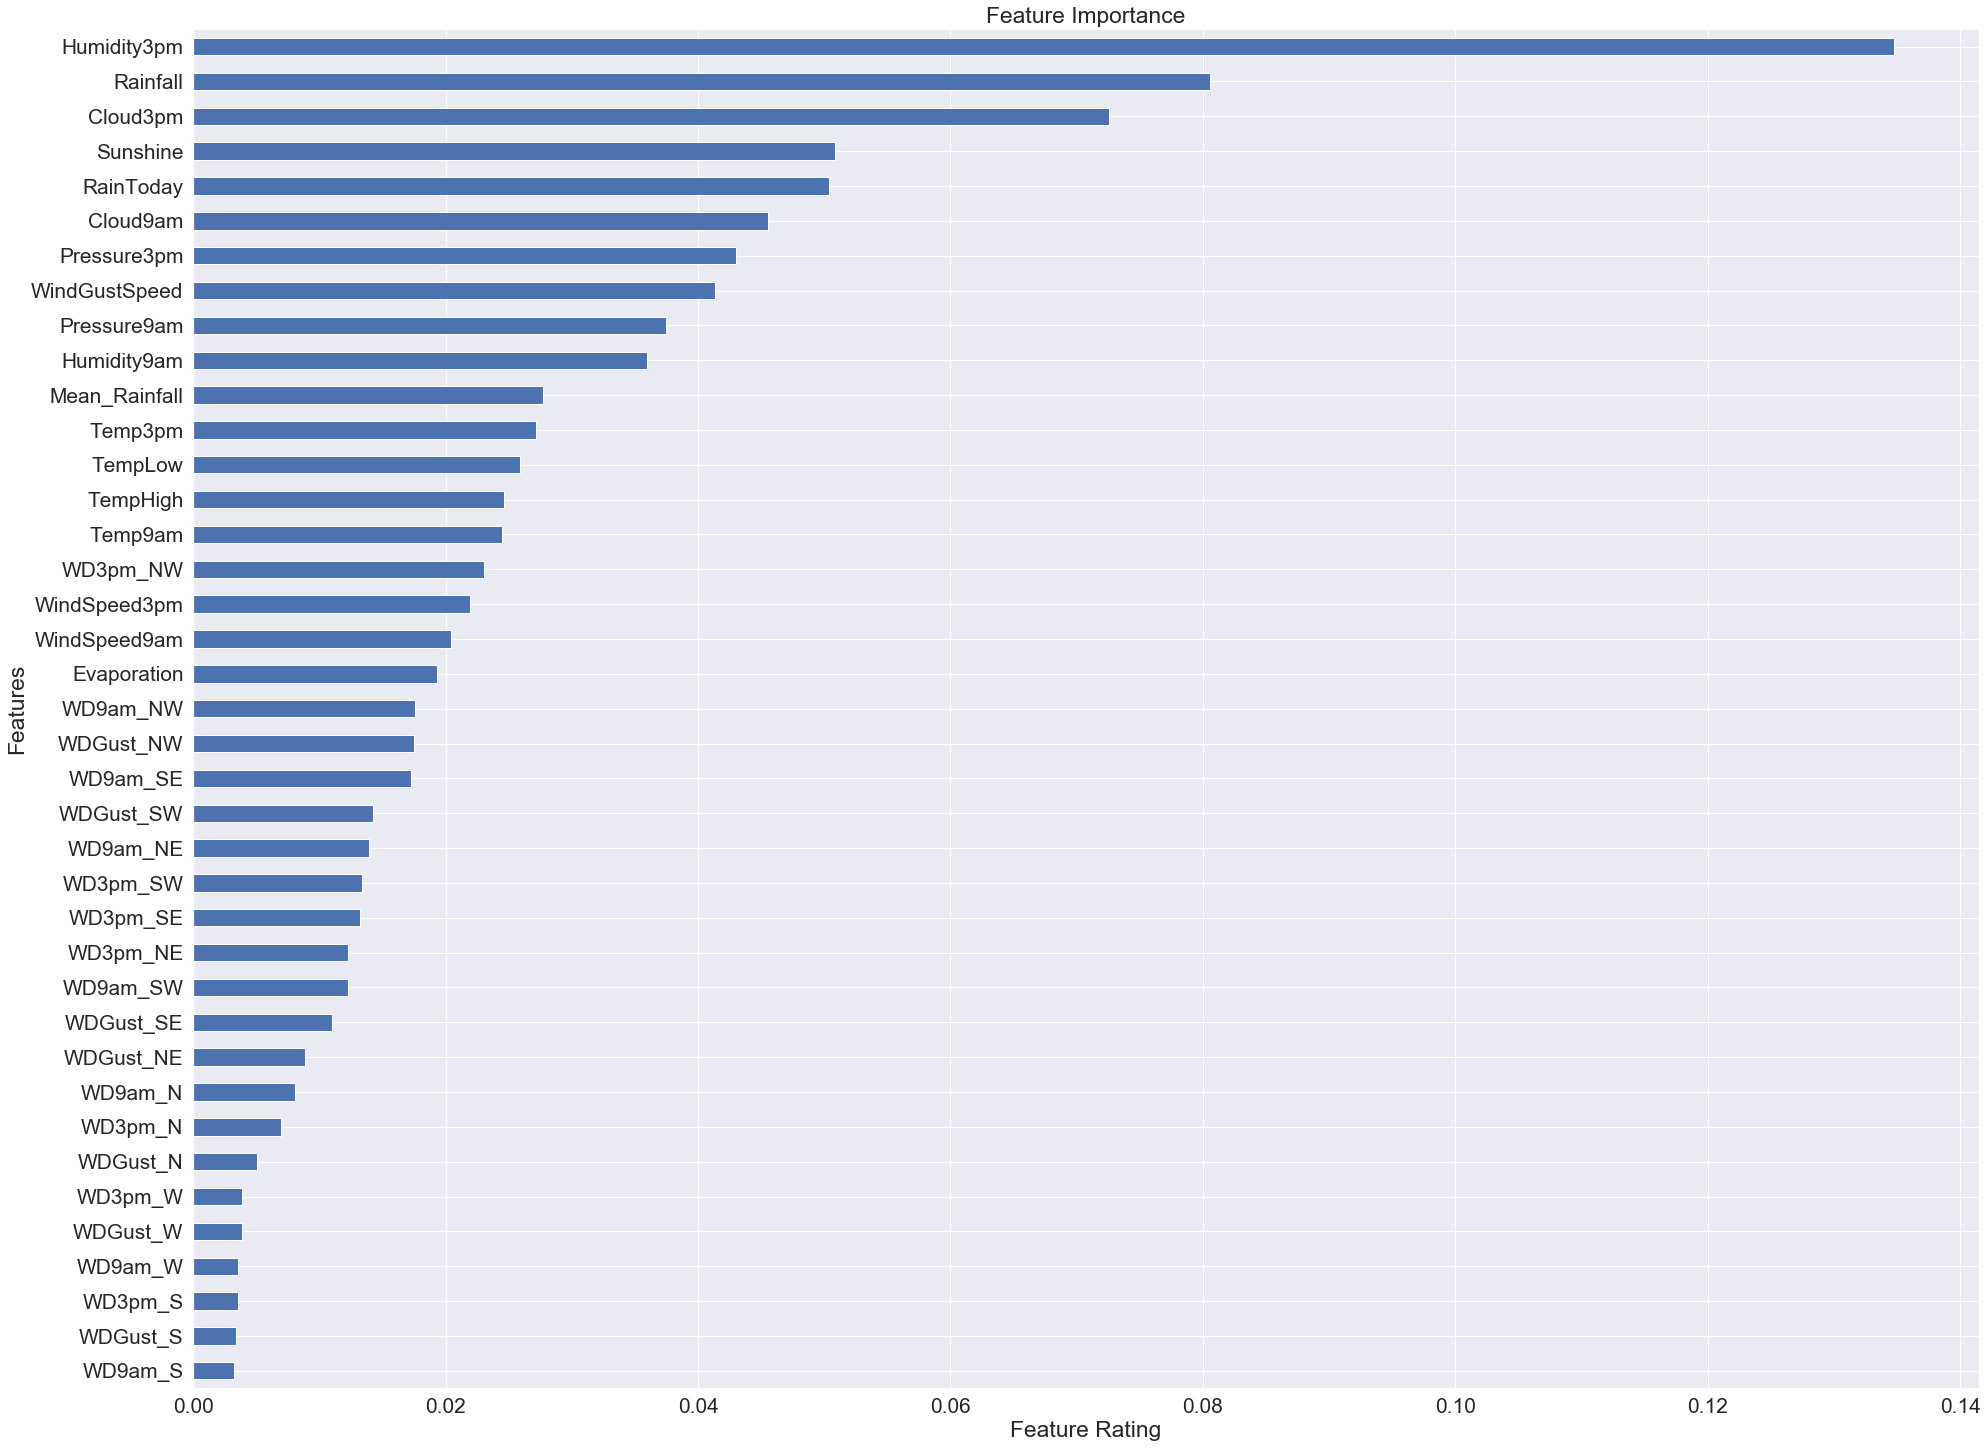

In [15]:
fig, ax = plt.subplots(figsize=(32,25))
ax = rf_feat_imp.plot(kind='barh')
ax.set()
# ax = sns.barplot(x='Mean_Rainfall', y='Location', data=new_df)
sns.set(font_scale=1.9)
plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('Feature Rating')
plt.savefig('rf_feat_imp.png', dpi = 100)

In [6]:
len(df.columns)

43

In [7]:
pcafeat = list(df.drop(['Date', 'Location', 'Lat_Lon', 'RainToday', 'RainTomorrow', 'WDGust_N', 'WDGust_NE',
                        'WDGust_NW','WDGust_S', 'WDGust_SE', 'WDGust_SW', 'WDGust_W', 'WD9am_N', 'WD9am_NE',
                        'WD9am_NW', 'WD9am_S', 'WD9am_SE', 'WD9am_SW', 'WD9am_W', 'WD3pm_N','WD3pm_NE',
                        'WD3pm_NW', 'WD3pm_S', 'WD3pm_SE', 'WD3pm_SW', 'WD3pm_W'], axis=1).columns)

In [8]:
len(pcafeat)

17

In [9]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df.loc[:, pcafeat].values
# Separating out the target
y = df.loc[:,['RainTomorrow']].values

In [10]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [11]:
# create principal components 
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

In [12]:
pca.explained_variance_ratio_

array([0.30857134, 0.18267124, 0.12218826, 0.07421616, 0.06439738,
       0.05106842, 0.04114733, 0.03236833, 0.02879131, 0.02546516,
       0.02471678, 0.0176661 , 0.01633187, 0.00617627, 0.00202557,
       0.00147102, 0.00072748])

In [13]:
pca.explained_variance_

array([5.24575004, 3.1054331 , 2.07721519, 1.26168361, 1.09476316,
       0.86816927, 0.69950954, 0.55026547, 0.48945575, 0.43291079,
       0.42018822, 0.30032589, 0.27764372, 0.10499734, 0.03443493,
       0.02500744, 0.01236728])

Text(0, 0.5, 'proportion of explained variance')

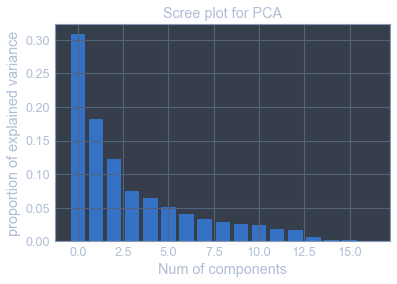

In [14]:
index = np.arange(17)
plt.bar(index, pca.explained_variance_ratio_)#[:11])
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

In [29]:
structure_loading_1 = pca.components_[0]* np.sqrt(pca.explained_variance_[0])
str_loading_1 = pd.Series(structure_loading_1, index=pcafeat)
str_loading_1.sort_values(ascending=False)

TempHigh         0.903235
Temp3pm          0.890137
Temp9am          0.879220
TempLow          0.740695
Evaporation      0.593640
Sunshine         0.456622
WindGustSpeed    0.308373
WindSpeed3pm     0.266630
WindSpeed9am     0.251287
Mean_Rainfall    0.132185
Rainfall        -0.068153
Cloud3pm        -0.314849
Cloud9am        -0.324165
Pressure9am     -0.502581
Humidity3pm     -0.535712
Pressure3pm     -0.563135
Humidity9am     -0.665316
dtype: float64

In [36]:
structure_loading_2 = pca.components_[1]* np.sqrt(pca.explained_variance_[1])
str_loading_2 = pd.Series(structure_loading_2, index=pcafeat)
str_loading_2.sort_values(ascending=False)

Cloud3pm         0.594543
Cloud9am         0.592189
Humidity3pm      0.573689
WindGustSpeed    0.527030
WindSpeed3pm     0.459770
Rainfall         0.420825
WindSpeed9am     0.383194
TempLow          0.343855
Humidity9am      0.305060
Mean_Rainfall    0.291215
Temp9am          0.144595
Evaporation     -0.075315
TempHigh        -0.103767
Temp3pm         -0.153012
Sunshine        -0.484238
Pressure3pm     -0.538752
Pressure9am     -0.614378
dtype: float64

In [37]:
structure_loading_3 = pca.components_[2]* np.sqrt(pca.explained_variance_[2])
str_loading_3 = pd.Series(structure_loading_3, index=pcafeat)
str_loading_3.sort_values(ascending=False)

WindGustSpeed    0.642837
WindSpeed9am     0.613688
WindSpeed3pm     0.569836
Sunshine         0.212254
Evaporation      0.062278
Pressure3pm     -0.023289
Pressure9am     -0.066459
Rainfall        -0.115463
Cloud3pm        -0.165104
Cloud9am        -0.230513
Humidity3pm     -0.288619
TempHigh        -0.293456
Temp3pm         -0.295303
Humidity9am     -0.325115
Temp9am         -0.345097
Mean_Rainfall   -0.404359
TempLow         -0.412447
dtype: float64

In [38]:
structure_loading_4 = pca.components_[3]* np.sqrt(pca.explained_variance_[3])
str_loading_4 = pd.Series(structure_loading_4, index=pcafeat)
str_loading_4.sort_values(ascending=False)

Mean_Rainfall    0.693265
Pressure3pm      0.346626
Pressure9am      0.331869
WindSpeed3pm     0.308800
Humidity3pm      0.303398
Sunshine         0.249286
WindSpeed9am     0.242114
TempLow          0.173577
Rainfall         0.148922
Temp9am          0.115165
Humidity9am      0.101733
WindGustSpeed    0.057606
Evaporation     -0.064450
TempHigh        -0.071886
Temp3pm         -0.072484
Cloud9am        -0.255961
Cloud3pm        -0.288585
dtype: float64